# Explore here

In [ ]:
# ==============================
# 📊 Librerías de Manipulación de Datos
# ==============================
import pandas as pd
import numpy as np

# ==============================
# 📊 Visualización de Datos
# ==============================
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================
# ⚡ Machine Learning y Modelado
# ==============================
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# ==============================
# 📊 Evaluación del Modelo
# ==============================
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score, 
    confusion_matrix, roc_curve, auc
)

# ==============================
# 🔍 Interpretabilidad del Modelo (SHAP)
# ==============================
import shap

In [2]:
df = pd.read_csv('/workspaces/AK-EA-GG_ProyectoFinalDS-ML/data/loan_dataset.csv')

In [3]:
# Vista inicial
print(f"Dimensiones del dataset: {df.shape}")
print("\nPrimeras filas:")
display(df.head())

# Información sobre tipos de datos y valores nulos
print("\nInformación del dataset:")
df.info()

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
display(df.describe())

Dimensiones del dataset: (396030, 27)

Primeras filas:


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 3942

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


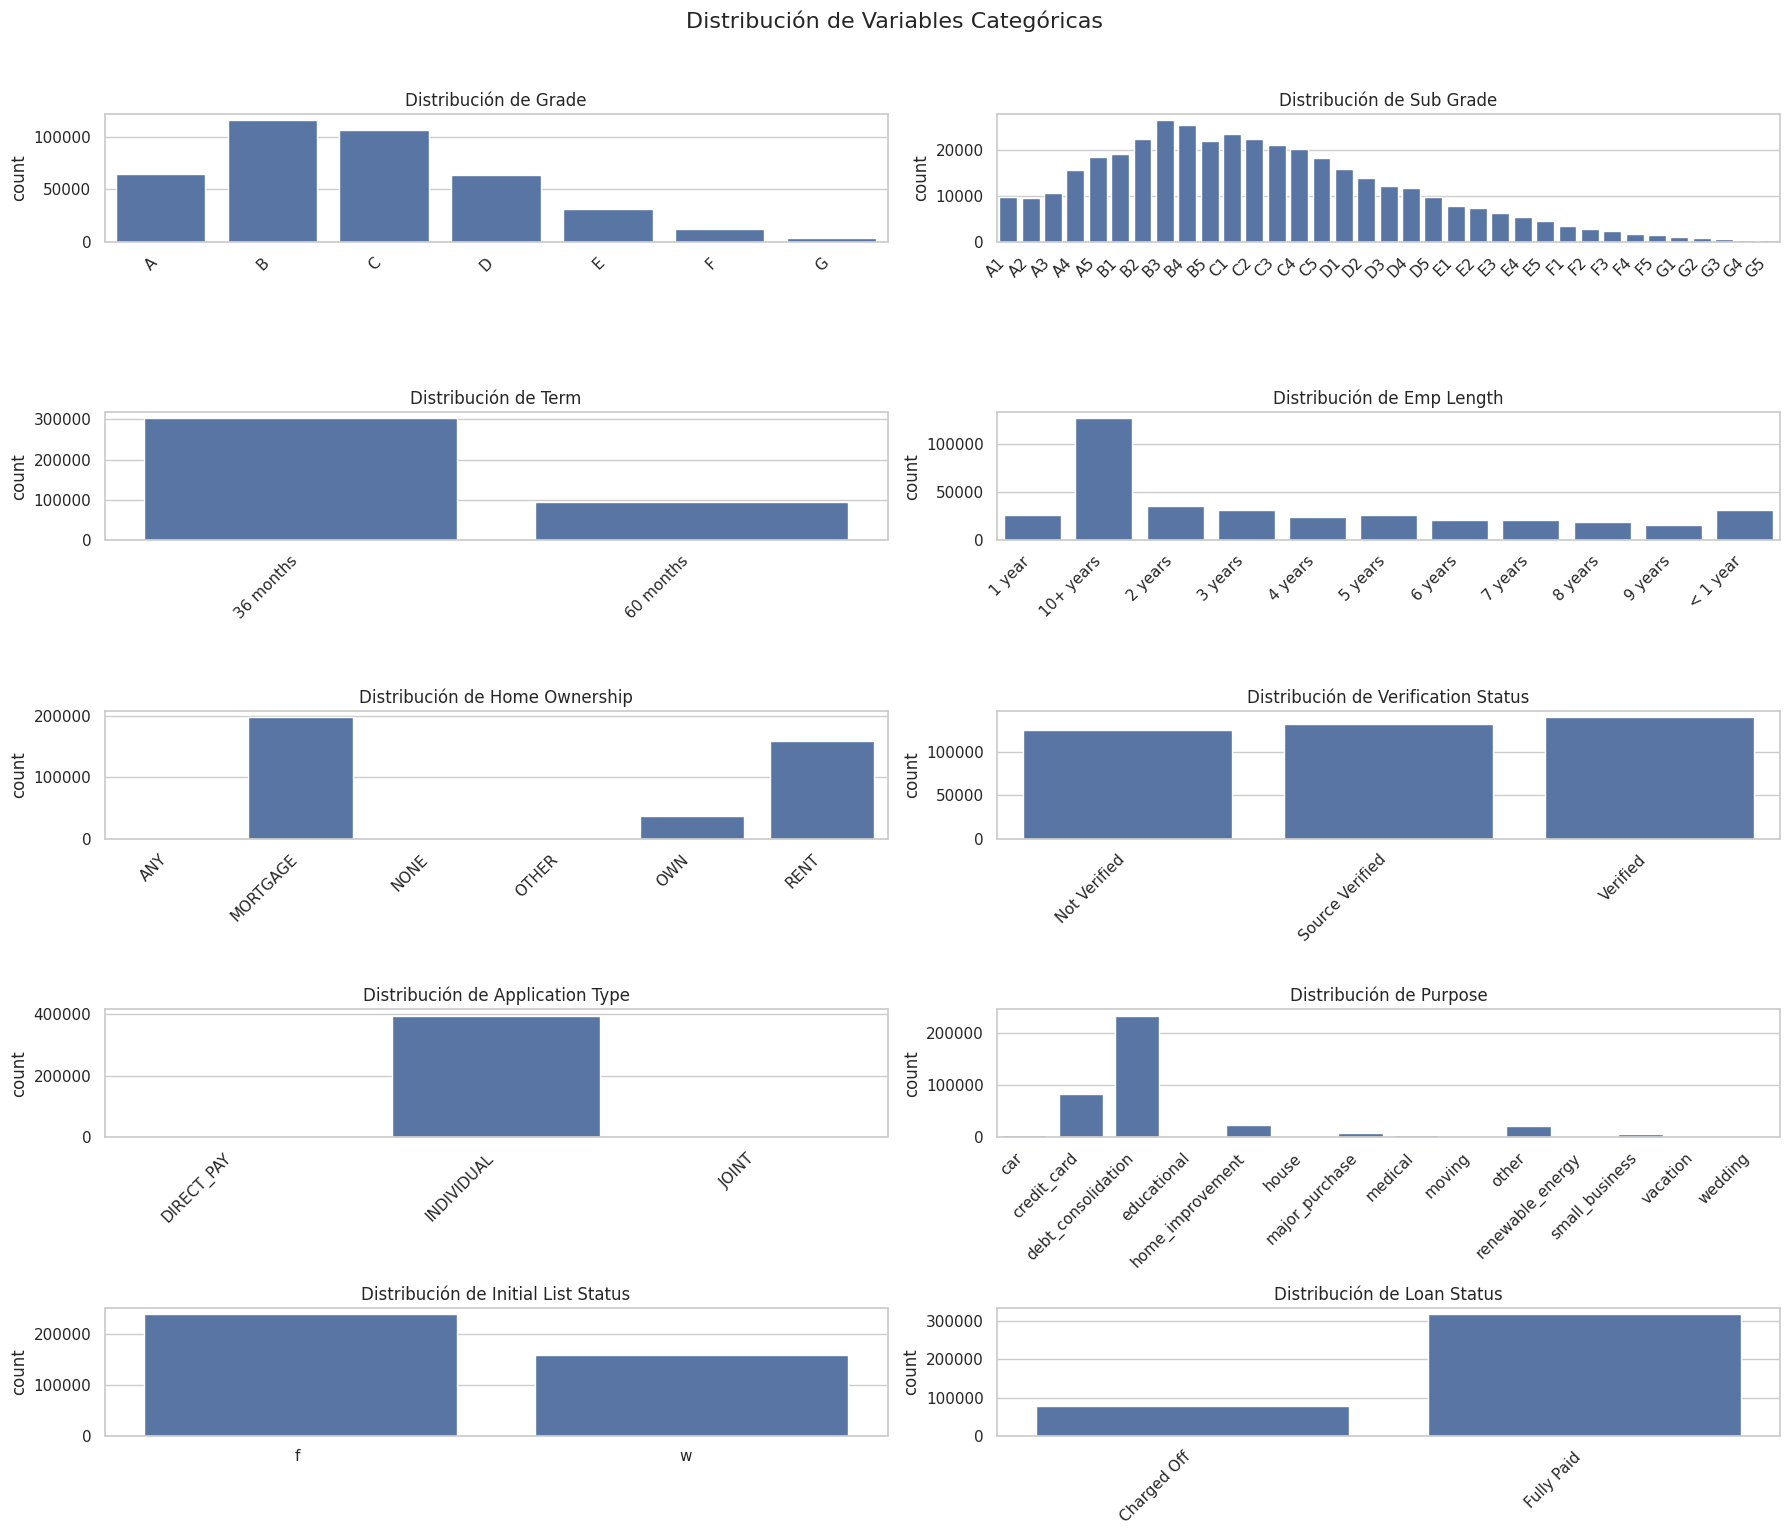

In [4]:
sns.set(style="whitegrid") 
plt.rcParams['font.size'] = 10 

fig, axes = plt.subplots(5, 2, figsize=(18, 15))
fig.suptitle('Distribución de Variables Categóricas', y=1.02, fontsize=16)

variables_cat = [
    "grade", "sub_grade", "term", "emp_length",
    "home_ownership", "verification_status", 
    "application_type", "purpose",
    "initial_list_status", "loan_status"
]

for ax, var in zip(axes.flatten(), variables_cat):
    order = sorted(df[var].dropna().unique())
    sns.countplot(ax=ax, data=df, x=var, order=order)
    ax.set_title(f'Distribución de {var.replace("_", " ").title()}')
    ax.set_xlabel('')
    
    if df[var].nunique() > 5 or any(len(str(x)) > 4 for x in df[var].unique()):
        ax.tick_params(axis='x', rotation=45)
    
    plt.setp(ax.get_xticklabels(), ha="right")

plt.tight_layout()
plt.show()

In [5]:
# conversion de variables categóricas por mascara

dict_loan_status={"Fully Paid":0, "Charged Off":1}
dict_initial_list_status = {"w":0, "f":1}
dict_emp_length = {"< 1 year":0, "1 year ":1, 
                   "2 years":2, "3 years":3, 
                   "4 years":4, "5 years":5, 
                   "6 years":6, "7 years":7, 
                   "8 years":8, "9 years":9, 
                   "10+ years":10}

df["loan_status"] = df["loan_status"].map(dict_loan_status)
df["initial_list_status"] = df["initial_list_status"].map(dict_initial_list_status)
df["emp_length"] = df["emp_length"].map(dict_emp_length)

In [6]:
# conversion de term con split y numeric
df['term'] = df['term'].str.split().str[0]
df['term'] = pd.to_numeric(df['term'])

In [7]:
# extraccion de state de la columna address
df['state'] = df['address'].str.extract(r',\s*([A-Z]{2})\s*\d{5}')

In [8]:
# conversion de issue_d a datetime
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')

# separar columnas en month y year
df['issue_month'] = df['issue_d'].dt.month
df['issue_year'] = df['issue_d'].dt.year

In [9]:
# dropeo de columnas innecesarias

df = df.drop("grade", axis=1)
df = df.drop("title", axis=1)
df = df.drop("earliest_cr_line", axis=1)
df = df.drop("application_type", axis=1)
df = df.drop("address", axis=1)
df = df.drop("issue_d", axis=1)
df = df.drop("emp_title", axis=1)

In [10]:
# conversion de variables categóricas a numéricas por label encoding

# Inicializar el LabelEncoder
le = LabelEncoder()
#le_state = LabelEncoder()
#le_purpose = LabelEncoder()

# Aplicar el encoder a la columnas
df['sub_grade'] = le.fit_transform(df['sub_grade'])
#df['state'] = le_state.fit_transform(df['state'])
#df['purpose'] = le_purpose.fit_transform(df['purpose'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  int64  
 5   emp_length            351847 non-null  float64
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   loan_status           396030 non-null  int64  
 10  purpose               396030 non-null  object 
 11  dti                   396030 non-null  float64
 12  open_acc              396030 non-null  float64
 13  pub_rec               396030 non-null  float64
 14  revol_bal             396030 non-null  float64
 15  

In [12]:
#aplicacion del one hot encoding a las variables categóricas restantes

# Columnas categóricas
columnas_categoricas = ["home_ownership", "verification_status", "state", "purpose"]

# Inicializar el encoder
encoder = OneHotEncoder(
    sparse_output=False # Devuelve un array denso (no sparse)
)

# Aplicar one-hot encoding
encoded_data = encoder.fit_transform(df[columnas_categoricas])

# Convertir a DataFrame y asignar nombres de columnas
encoded_df = pd.DataFrame(
    encoded_data,
    columns=encoder.get_feature_names_out(columnas_categoricas)
)

# Concatenar con el DataFrame original (eliminando las columnas originales)
df_final = pd.concat([
    df.drop(columnas_categoricas, axis=1),
    encoded_df
], axis=1)

# Mostrar resultado
print(df_final.head())


   loan_amnt  term  int_rate  installment  sub_grade  emp_length  annual_inc  \
0    10000.0    36     11.44       329.48          8        10.0    117000.0   
1     8000.0    36     11.99       265.68          9         4.0     65000.0   
2    15600.0    36     10.49       506.97          7         0.0     43057.0   
3     7200.0    36      6.49       220.65          1         6.0     54000.0   
4    24375.0    60     17.27       609.33         14         9.0     55000.0   

   loan_status    dti  open_acc  ...  purpose_home_improvement  purpose_house  \
0            0  26.24      16.0  ...                       0.0            0.0   
1            0  22.05      17.0  ...                       0.0            0.0   
2            0  12.79      13.0  ...                       0.0            0.0   
3            0   2.60       6.0  ...                       0.0            0.0   
4            1  33.95      13.0  ...                       0.0            0.0   

   purpose_major_purchase  purpo

In [13]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 94 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   term                                 396030 non-null  int64  
 2   int_rate                             396030 non-null  float64
 3   installment                          396030 non-null  float64
 4   sub_grade                            396030 non-null  int64  
 5   emp_length                           351847 non-null  float64
 6   annual_inc                           396030 non-null  float64
 7   loan_status                          396030 non-null  int64  
 8   dti                                  396030 non-null  float64
 9   open_acc                             396030 non-null  float64
 10  pub_rec                              396030 non-null  float64
 11  revol_bal    

In [14]:
# Seleccionar columnas numéricas
numericas_float = [
    'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
    'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
    'mort_acc', 'pub_rec_bankruptcies'
]

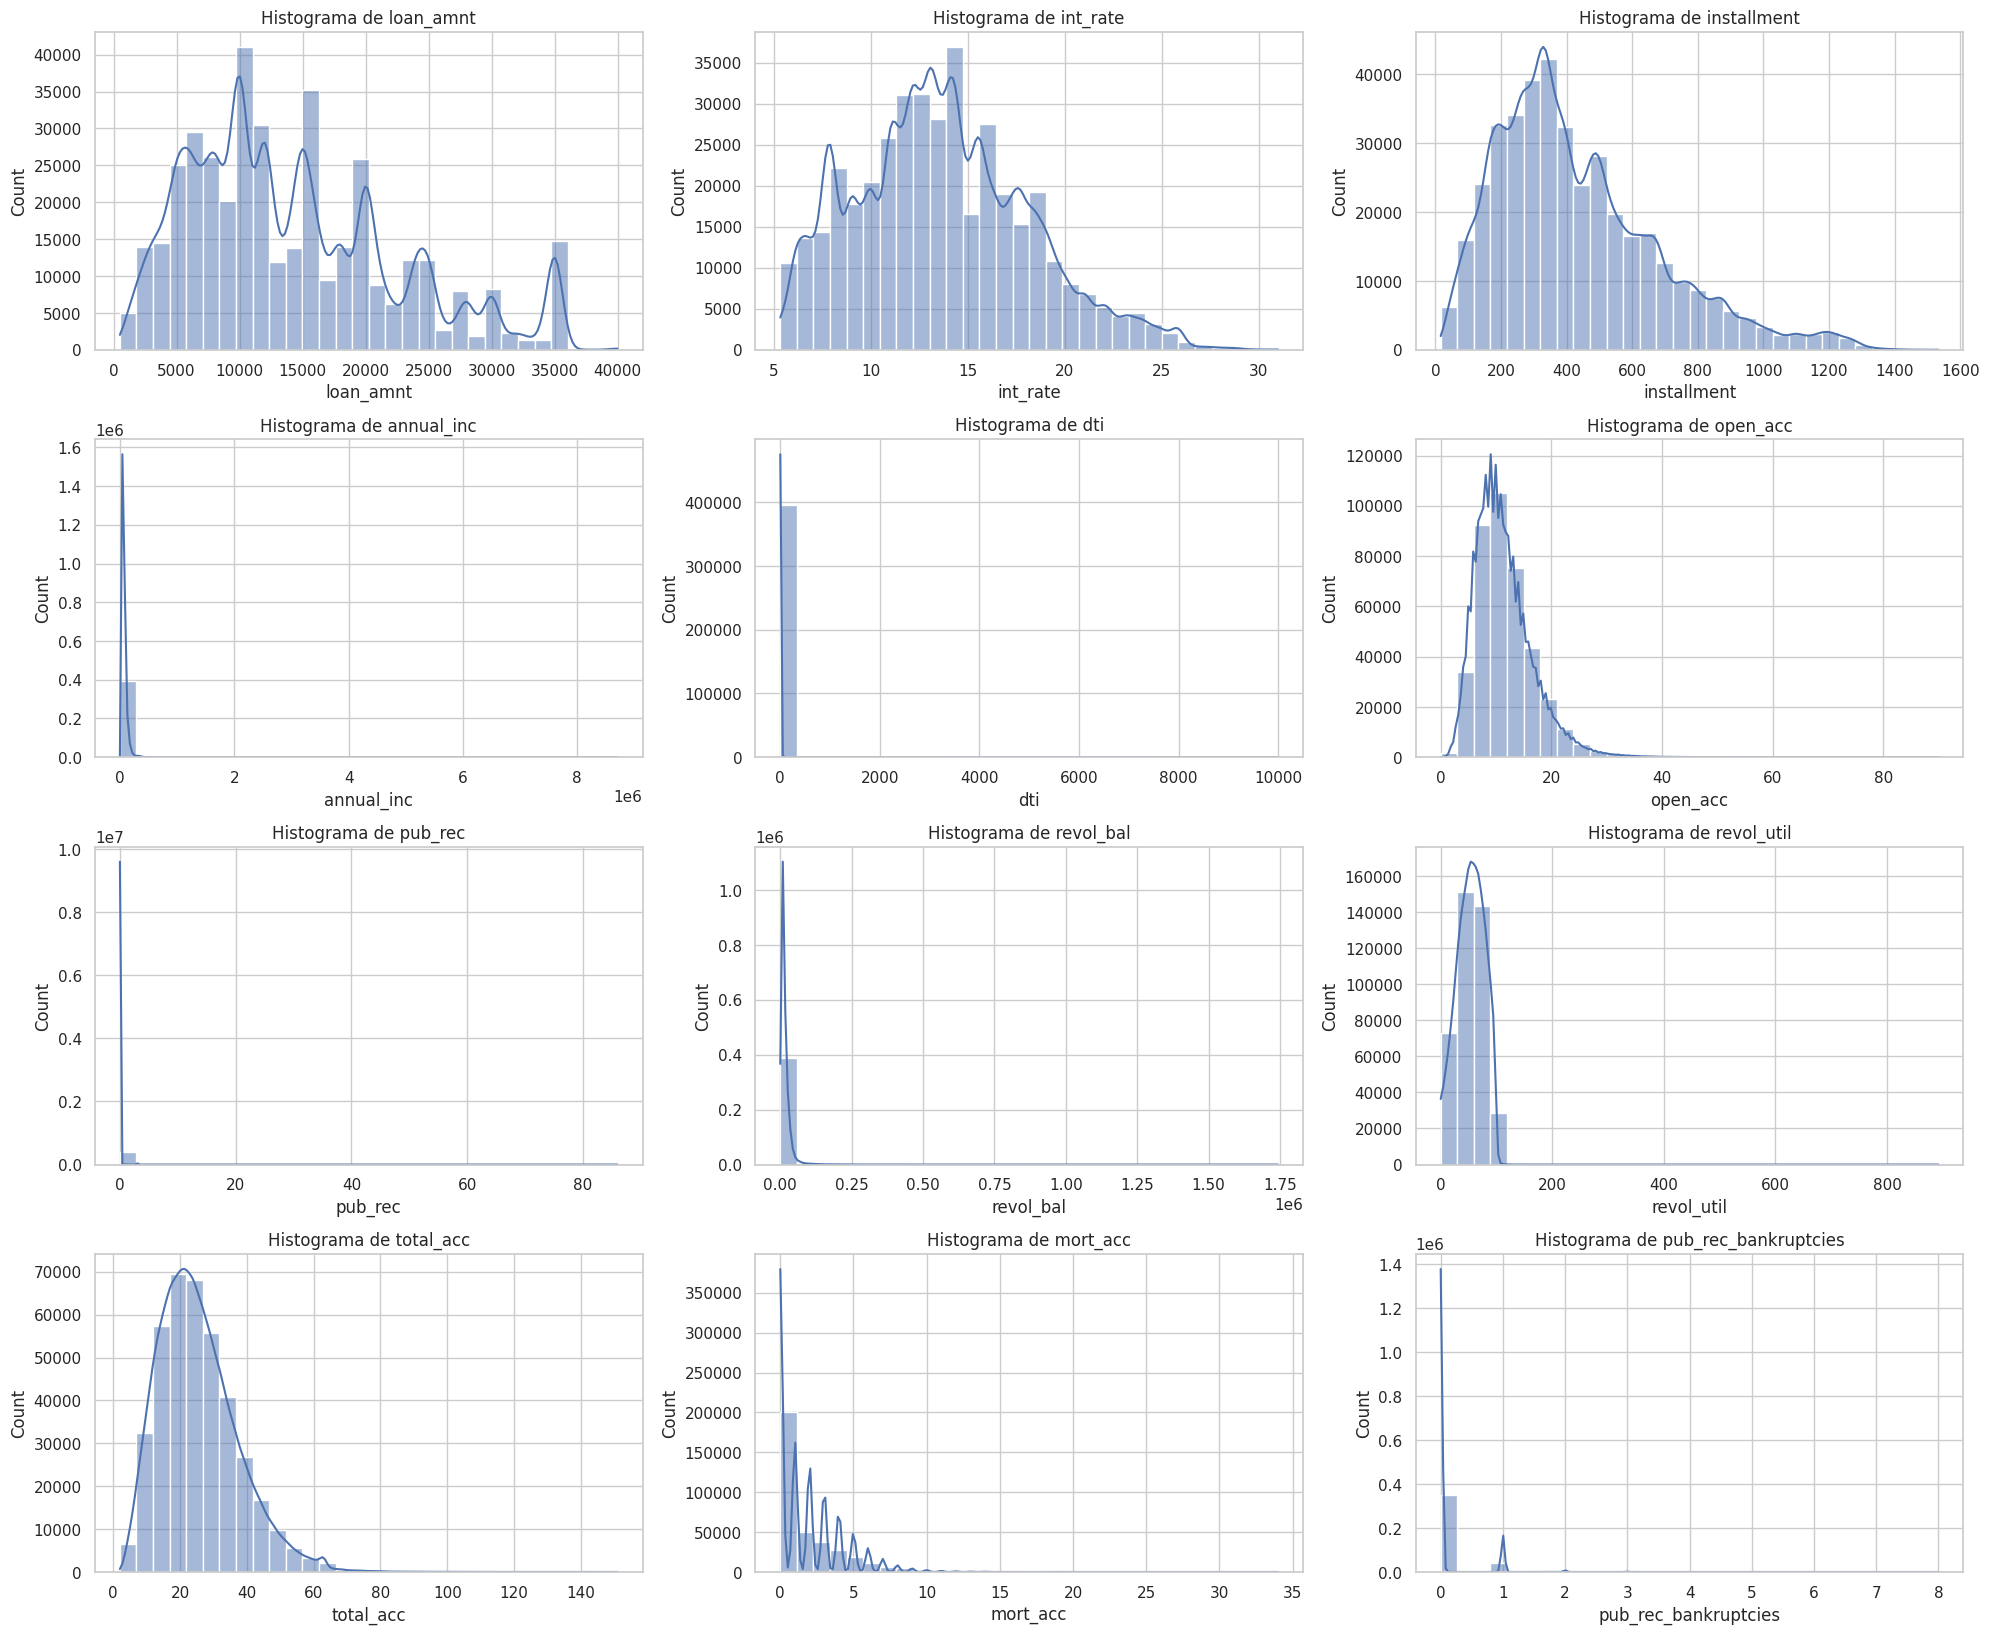

In [15]:
# Histograma de variables numéricas
plt.figure(figsize=(20, 20))
for i, col in enumerate(numericas_float):
    plt.subplot(len(numericas_float) // 3 + 1, 3, i + 1)
    sns.histplot(df_final[col], kde=True, bins=30)
    plt.title(f'Histograma de {col}')
plt.tight_layout()
plt.show()

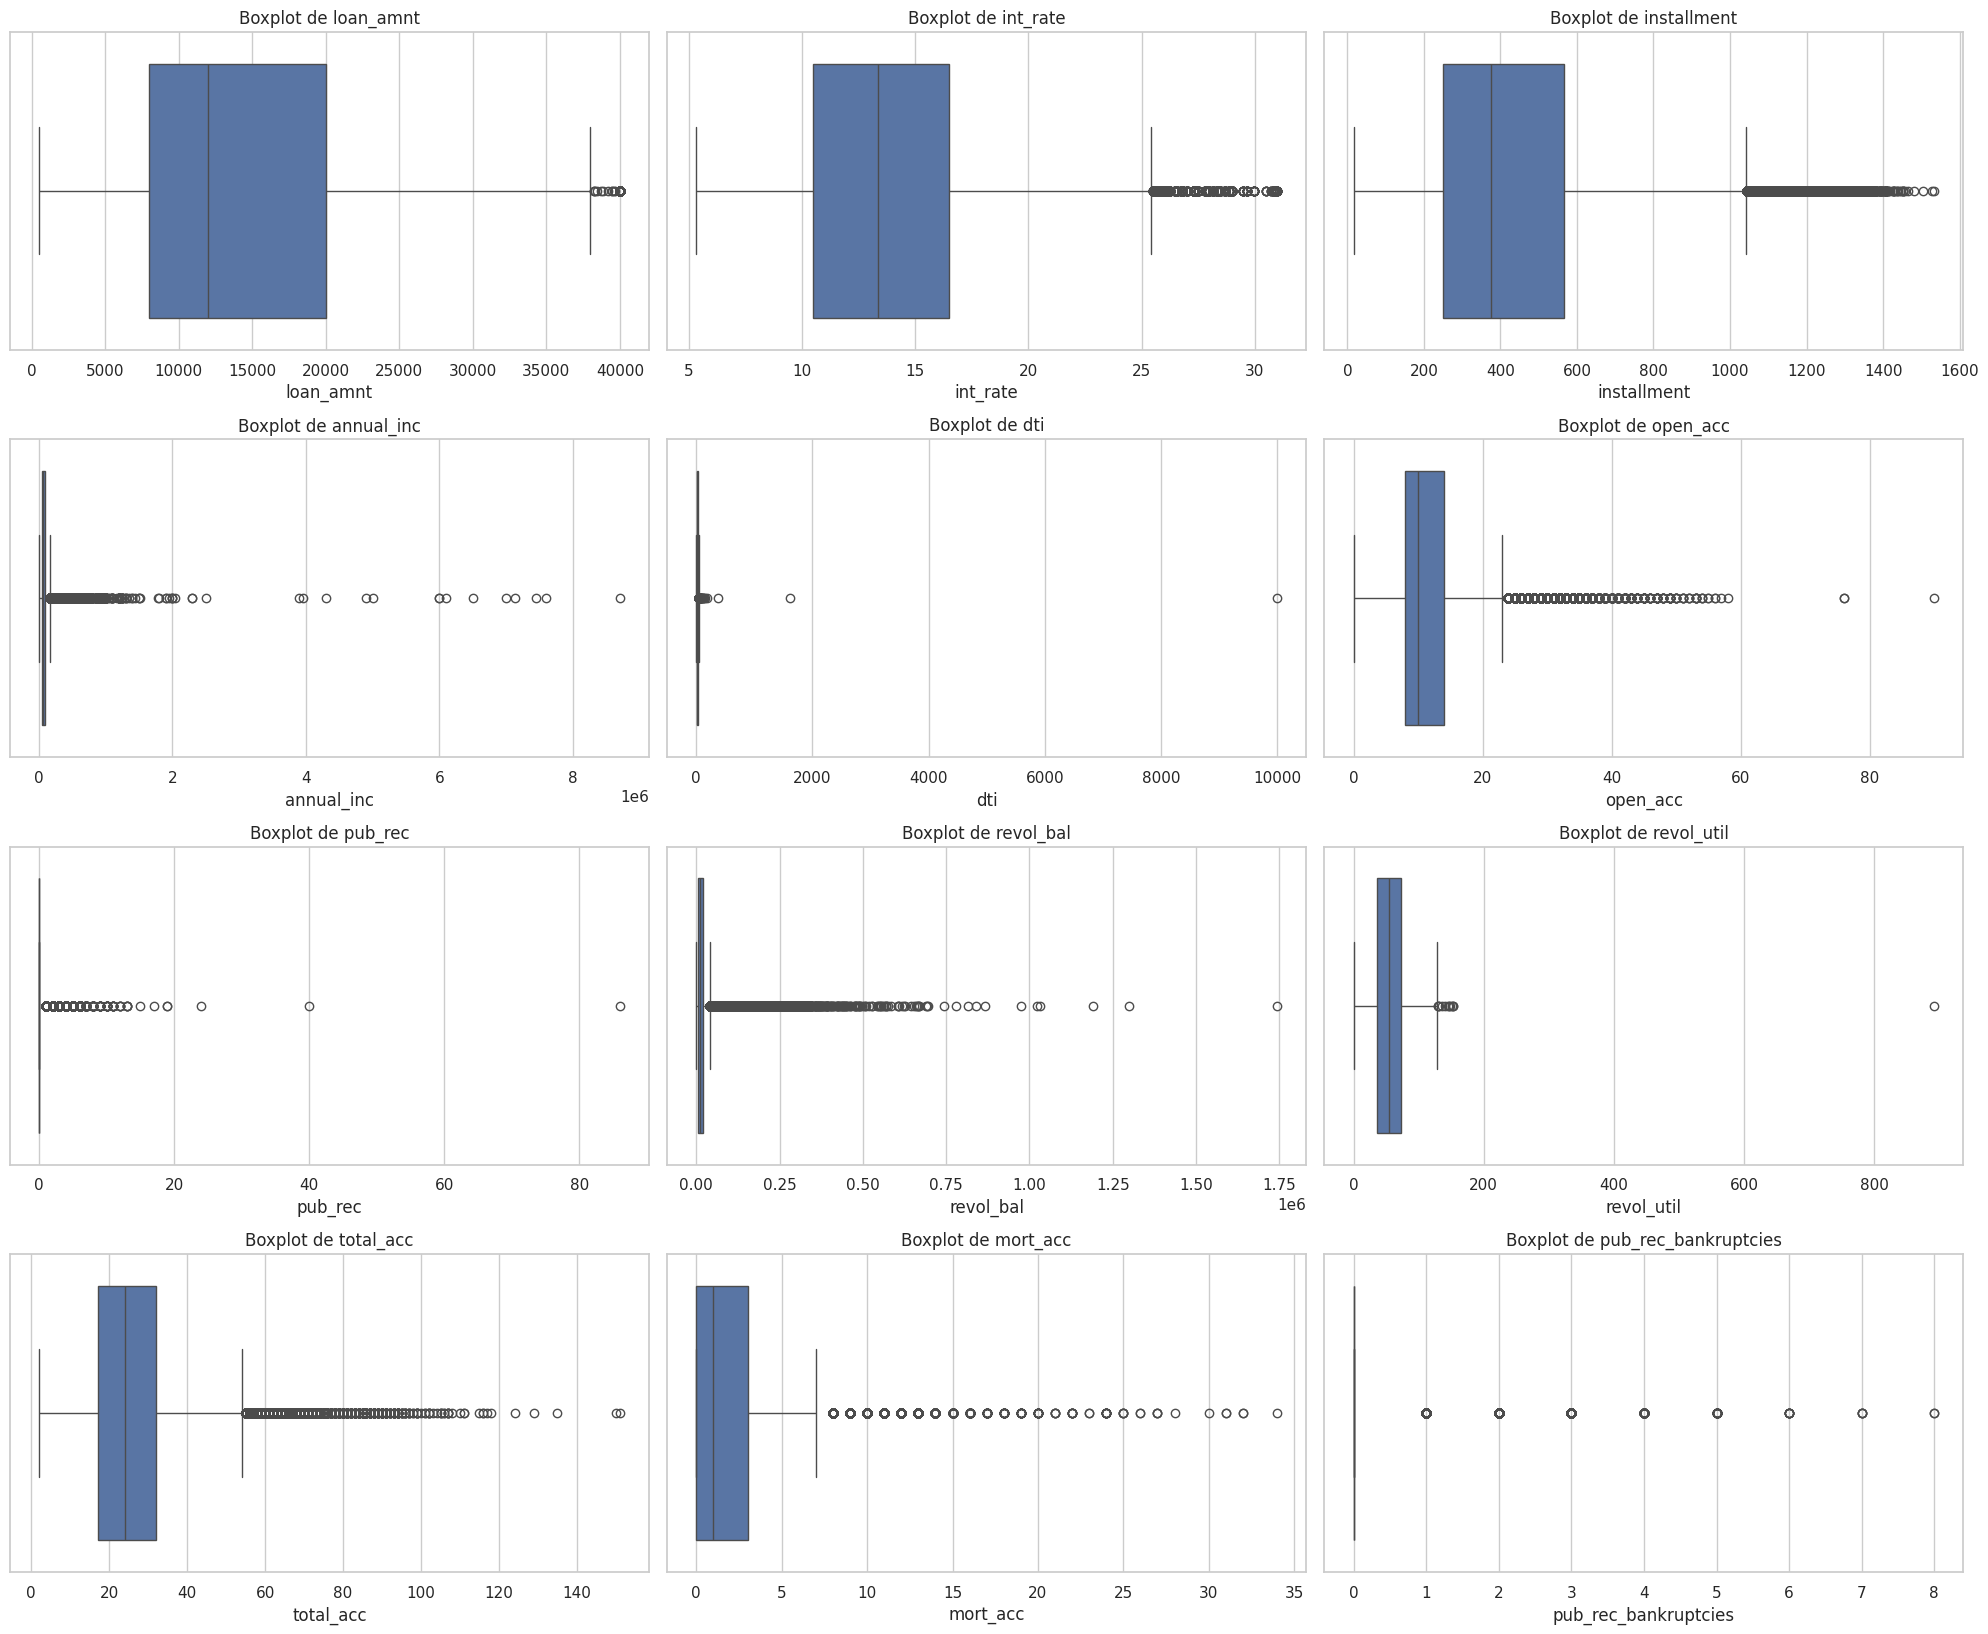

In [16]:
# Boxplots para las variables numéricas
plt.figure(figsize=(20, 20))
for i, col in enumerate(numericas_float):
    plt.subplot(len(numericas_float) // 3 + 1, 3, i + 1)
    sns.boxplot(x=df_final[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

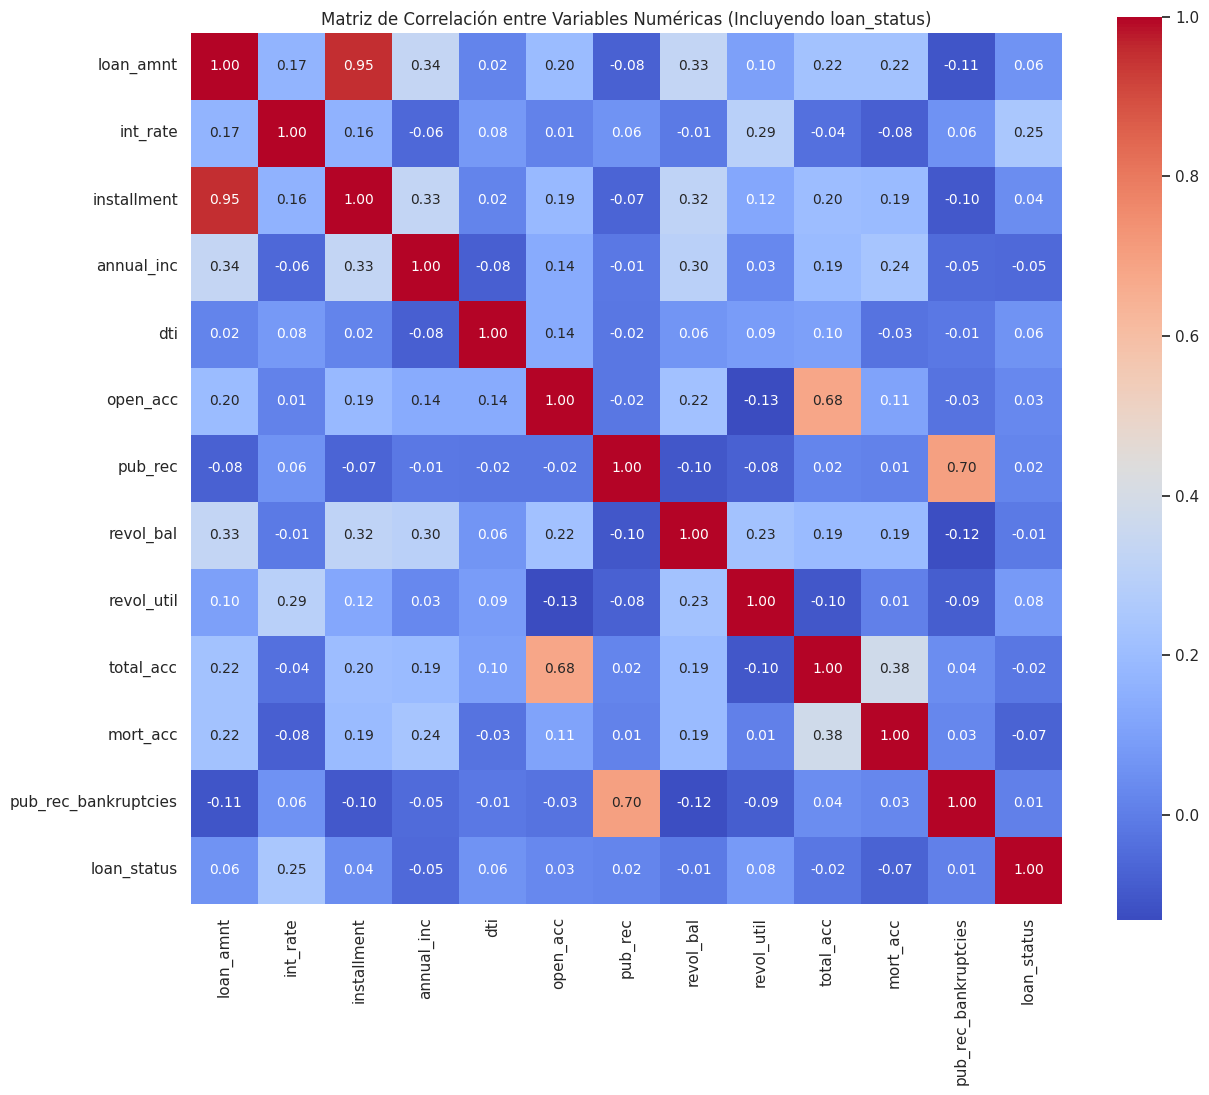

In [17]:
# Relación entre variables numéricas (float64 + loan_status)
# Agregar la variable objetivo a la lista
numericas_float_con_objetivo = numericas_float + ['loan_status']

# Calcular la matriz de correlación incluyendo la variable objetivo
corr_matrix = df_final[numericas_float_con_objetivo].corr()

# Mostrar el mapa de calor de la correlación
plt.figure(figsize=(13, 11))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación entre Variables Numéricas (Incluyendo loan_status)')
plt.tight_layout()
plt.show()

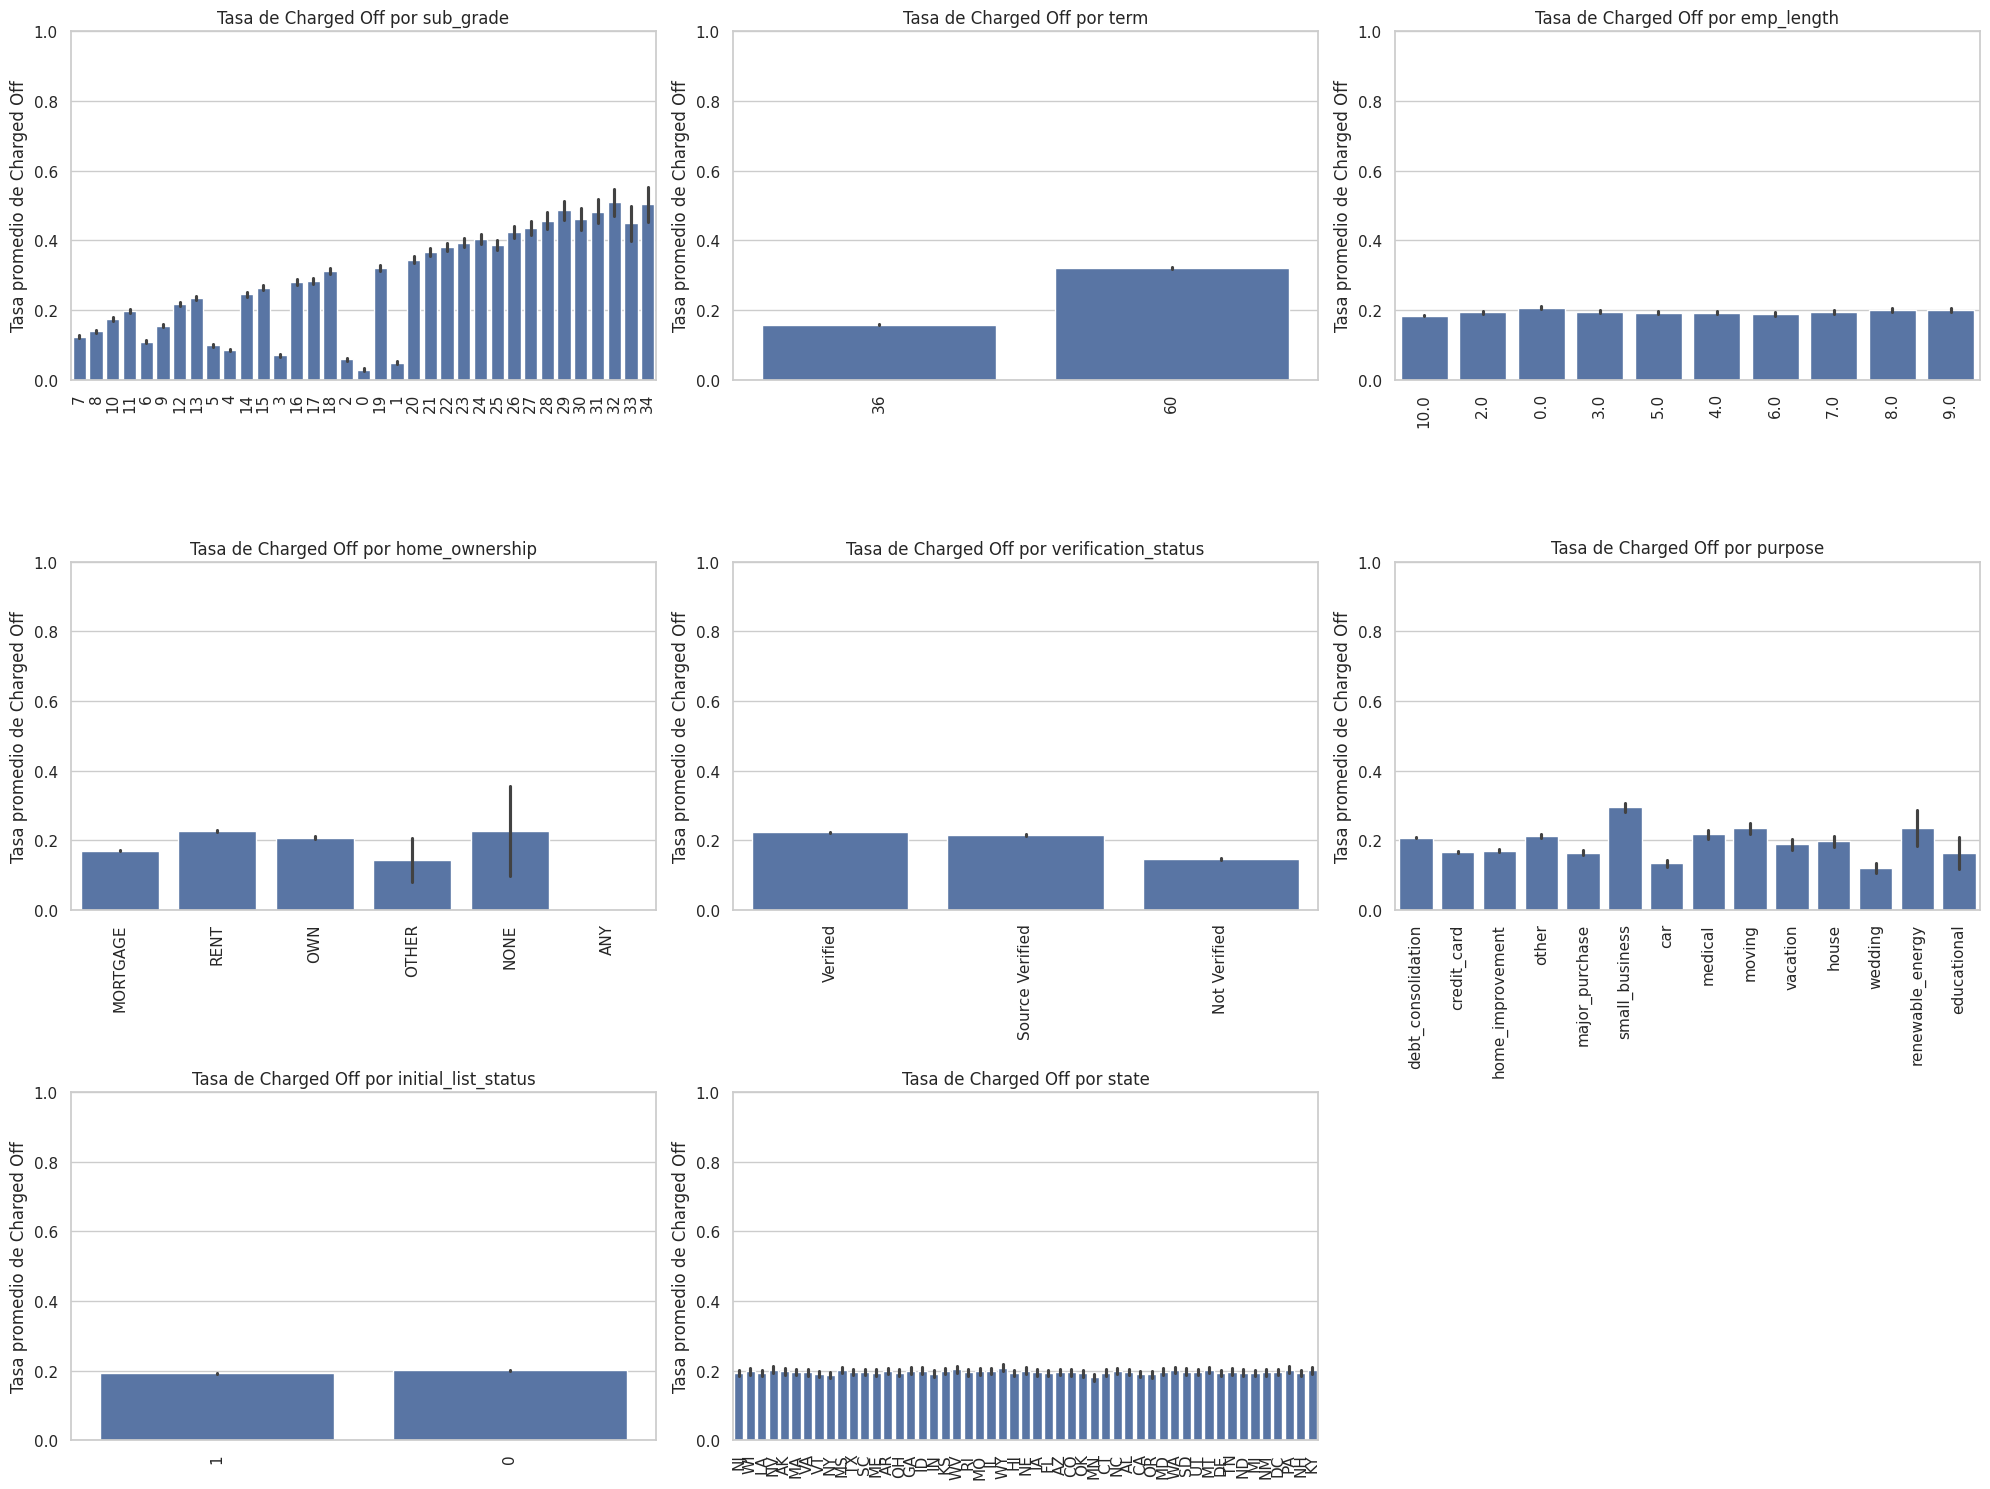

In [18]:
# Relación entre variables categóricas y la variable objetivo

# Usamos el DataFrame original antes del one-hot establecido como `df`

# Lista de variables categóricas originales

cat_vars = [
    "sub_grade", "term", "emp_length",
    "home_ownership", "verification_status", "purpose",
    "initial_list_status", "state"
]

# Graficar proporción de Charged Off por categoría
plt.figure(figsize=(20, 15))
for i, col in enumerate(cat_vars):
    plt.subplot(3, 3, i + 1)
    orden = df[col].value_counts().index
    sns.barplot(data=df, x=col, y="loan_status", order=orden)
    plt.xticks(rotation=90)
    plt.title(f'Tasa de Charged Off por {col}')
    plt.ylabel('Tasa promedio de Charged Off')
    plt.xlabel('')
    plt.ylim(0, 1)
plt.tight_layout()
plt.show()

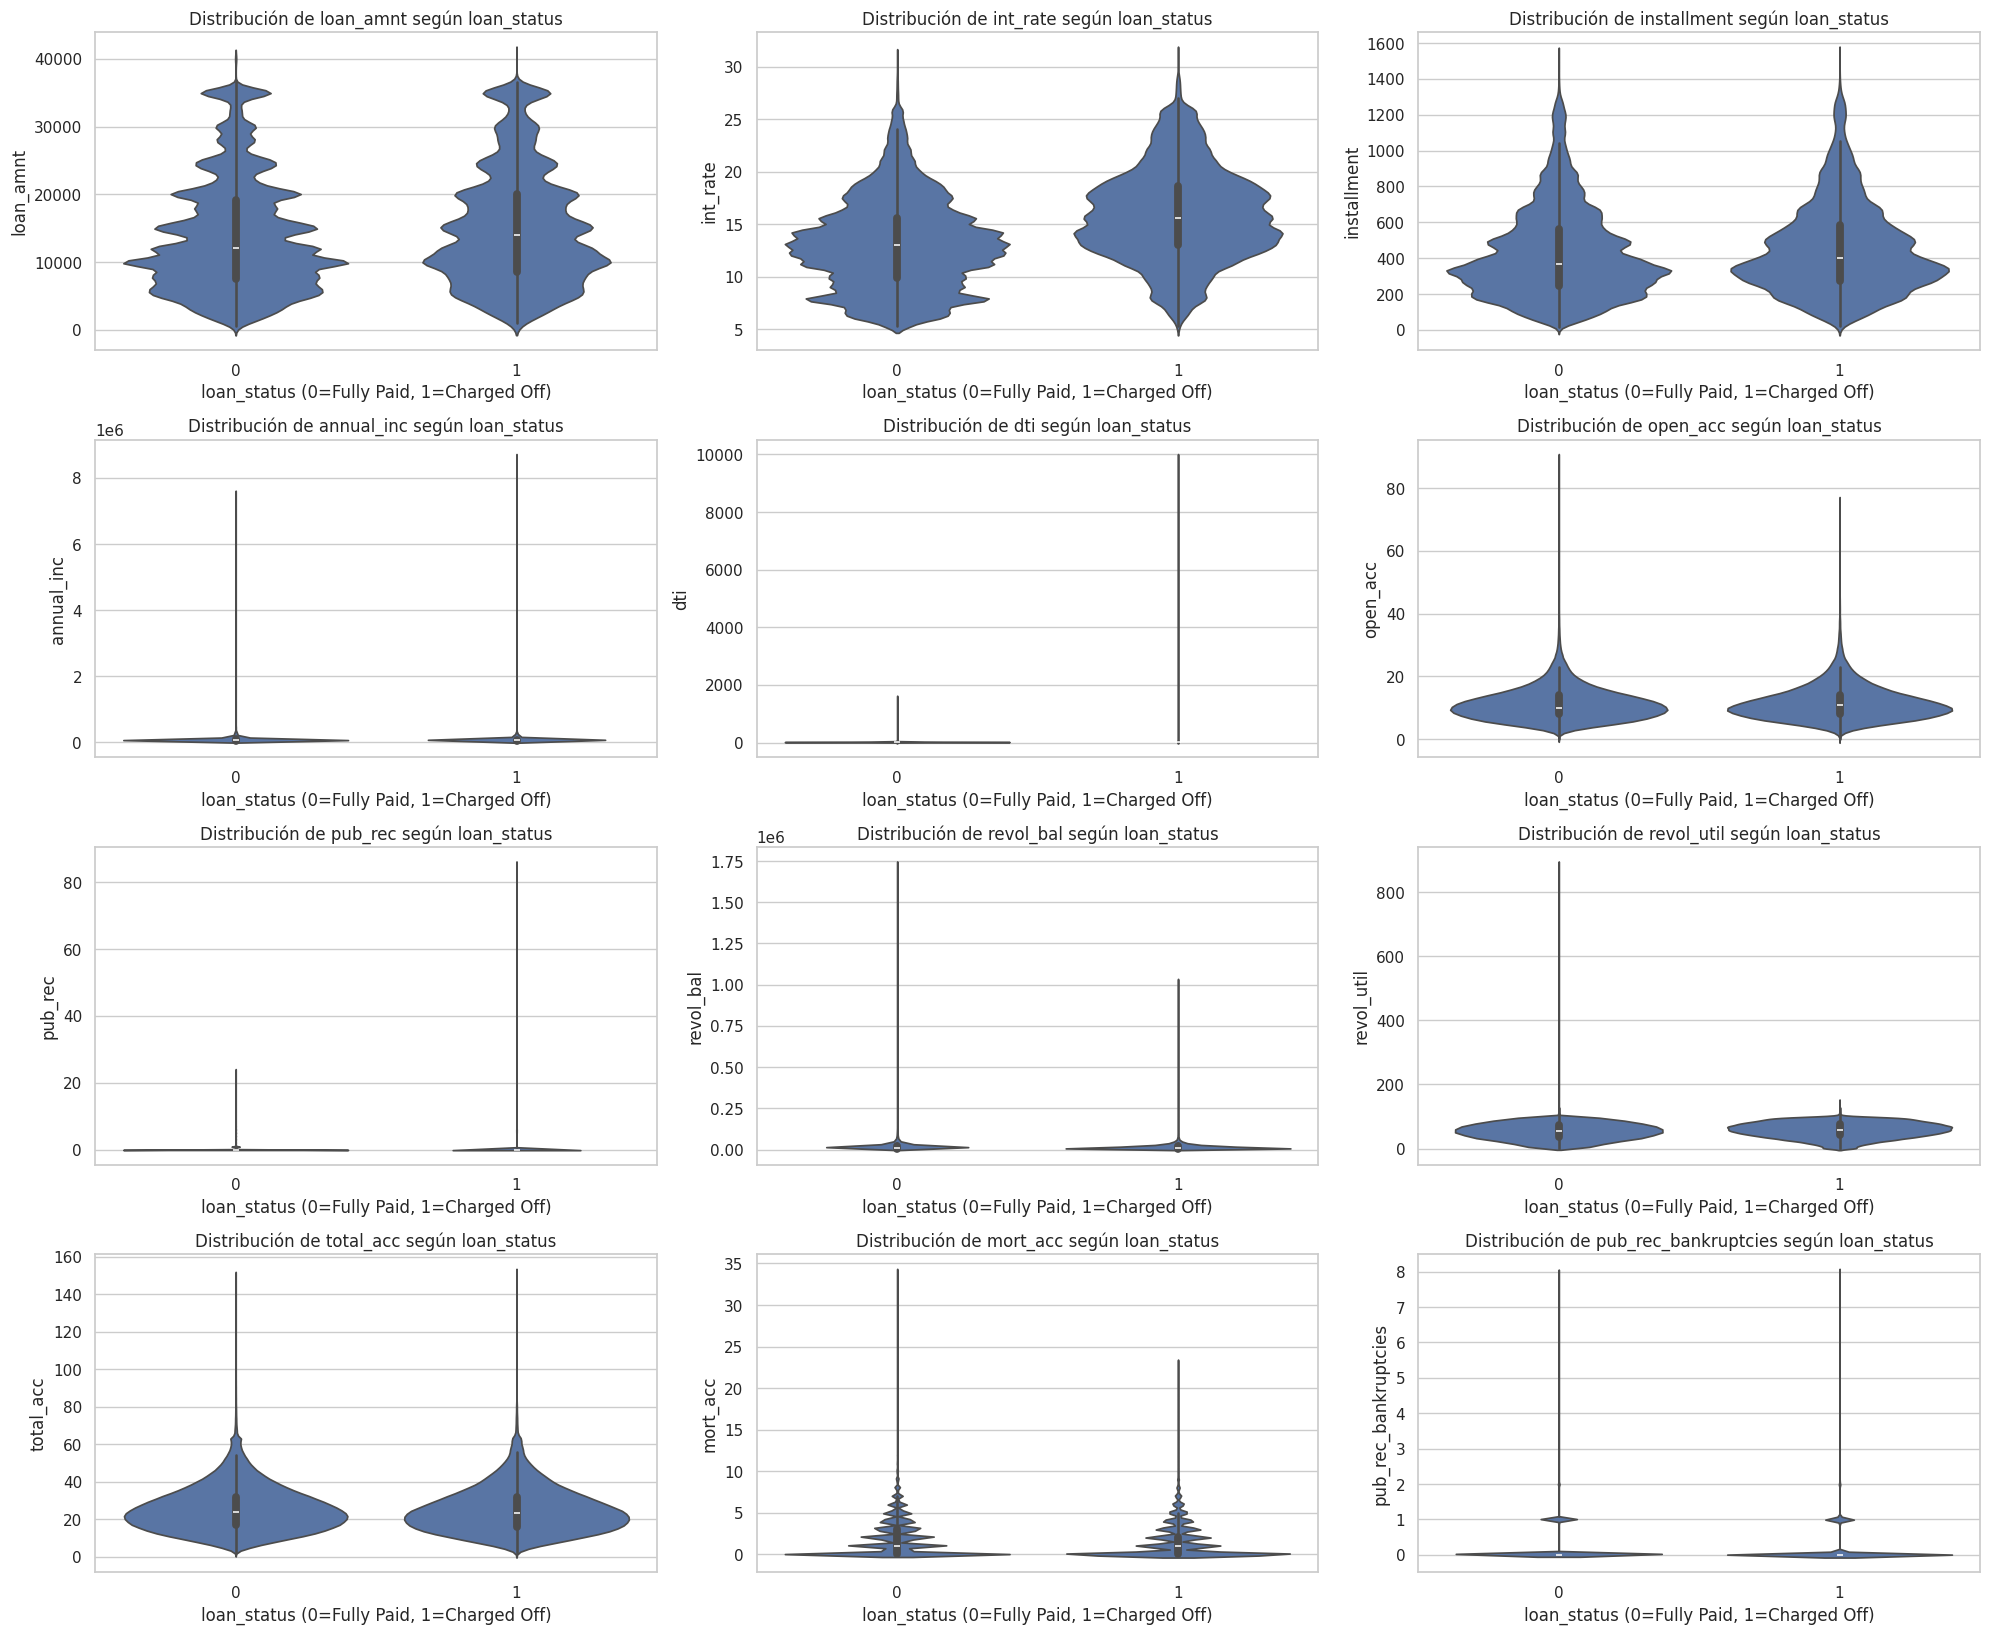

In [19]:
# Distribución de variables numéricas según loan_status
plt.figure(figsize=(20, 20))
for i, col in enumerate(numericas_float):
    plt.subplot(len(numericas_float) // 3 + 1, 3, i + 1)
    sns.violinplot(data=df_final, x='loan_status', y=col, inner='box')
    plt.title(f'Distribución de {col} según loan_status')
    plt.xlabel('loan_status (0=Fully Paid, 1=Charged Off)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [20]:
# Definir variables X e y
X = df_final.drop(columns=['loan_status'])
y = df_final['loan_status']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
# Instanciar el modelo de XGBoost
xgb_model = XGBClassifier(
    objective='binary:logistic', # Clasificación binaria
    eval_metric='logloss',       # Métrica de evaluación
    random_state=42,             # Reproducibilidad
)

In [22]:
# Entrenar el modelo
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

Threshold óptimo: 0.2


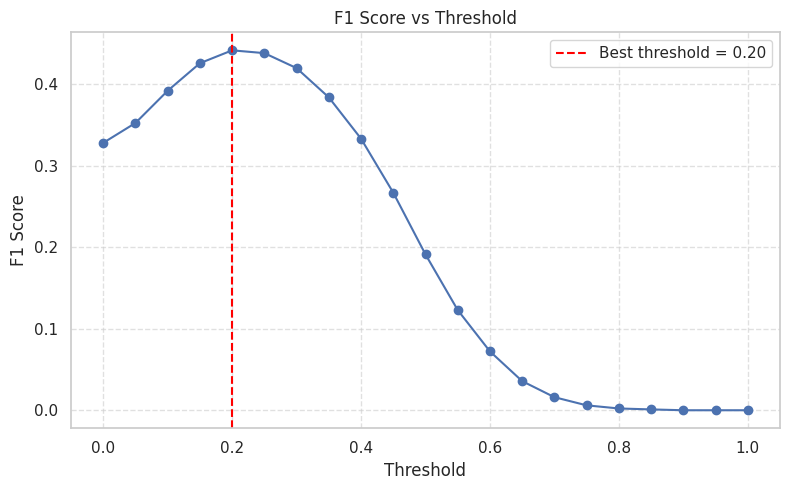

In [23]:
# Obtener las probabilidades del modelo (probabilidad de la clase positiva)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Definir lista de thresholds
thresholds = np.arange(0.0, 1.05, 0.05)
f1_scores = []

# Probar cada threshold y calcular F1-Score
for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

# Seleccionar el threshold óptimo
optimal_threshold = thresholds[np.argmax(f1_scores)]
print(f"Threshold óptimo: {optimal_threshold}")

# Graficar F1-Score vs Threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, f1_scores, marker='o')
plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f"Best threshold = {optimal_threshold:.2f}")
plt.title('F1 Score vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
# Predecir con el threshold óptimo
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

# Calcular métricas
precision = precision_score(y_test, y_pred_optimal)
recall = recall_score(y_test, y_pred_optimal)
f1 = f1_score(y_test, y_pred_optimal)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {roc_auc:.4f}")

Precision: 0.3316
Recall: 0.6601
F1-Score: 0.4414
AUC: 0.7284


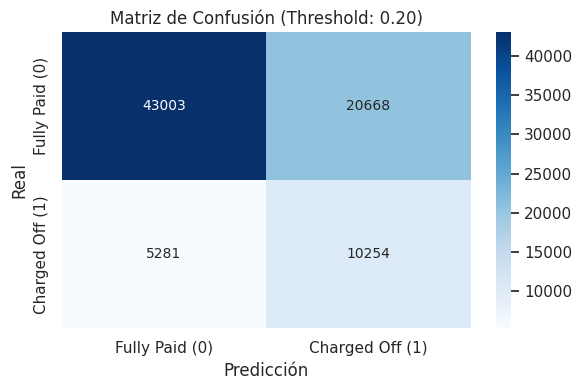

In [25]:
# Calcular la matriz de confusión con el threshold óptimo
y_pred_opt = (y_prob >= optimal_threshold).astype(int)
cm = confusion_matrix(y_test, y_pred_opt)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Fully Paid (0)', 'Charged Off (1)'],
            yticklabels=['Fully Paid (0)', 'Charged Off (1)'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title(f'Matriz de Confusión (Threshold: {optimal_threshold:.2f})')
plt.tight_layout()
plt.show()

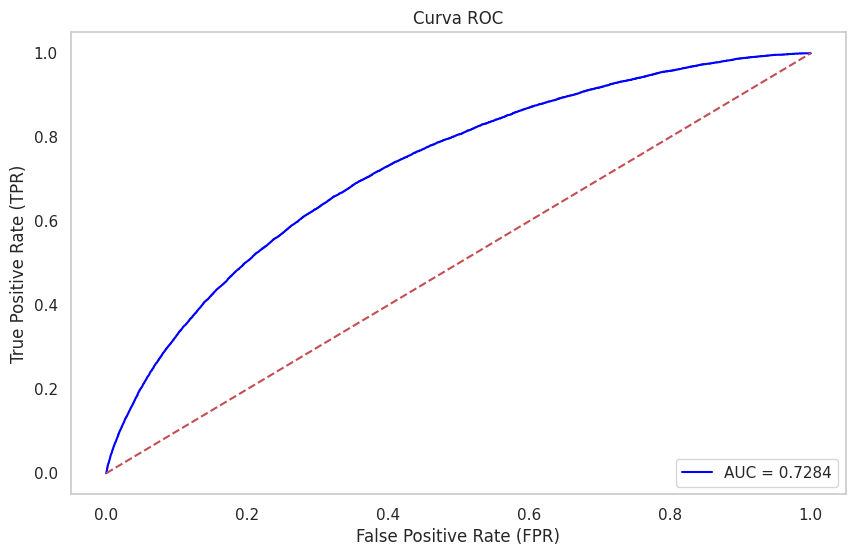

In [26]:
# Calcular FPR, TPR y thresholds para la curva ROC
fpr, tpr, roc_thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.title("Curva ROC")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

100%|===================| 78948/79206 [04:09<00:00]        

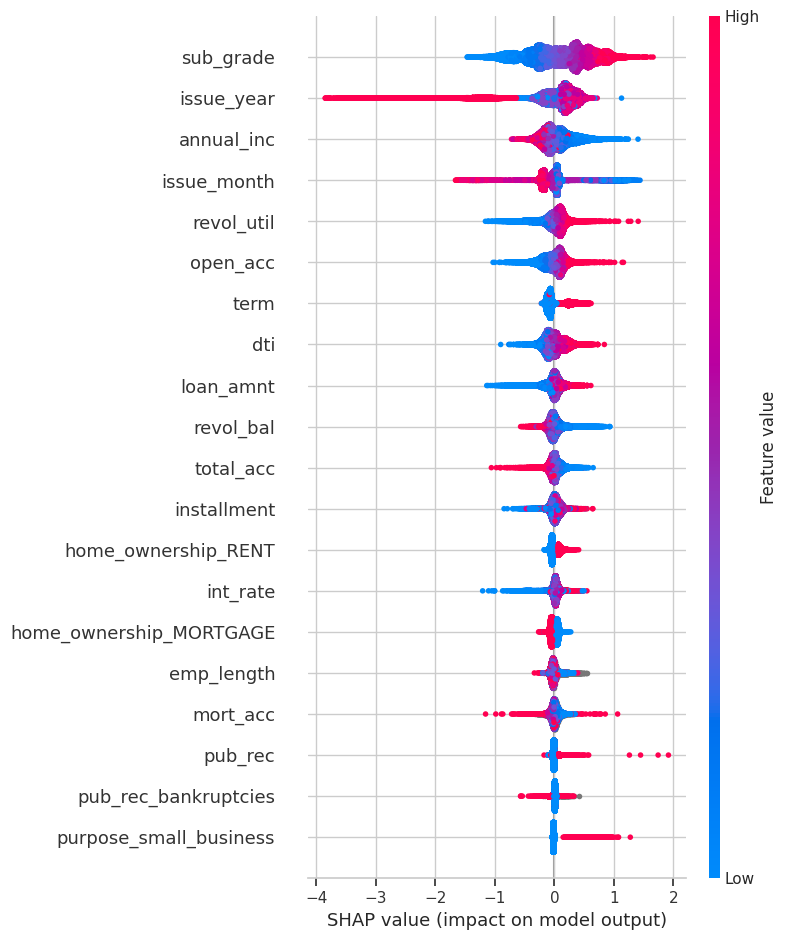

In [27]:
# Crear el Explainer de SHAP para XGBoost
explainer = shap.Explainer(xgb_model, X_train)

# Calcular valores SHAP para el conjunto de prueba
shap_values = explainer(X_test)

# Resumen global de valores SHAP
shap.summary_plot(shap_values, X_test)

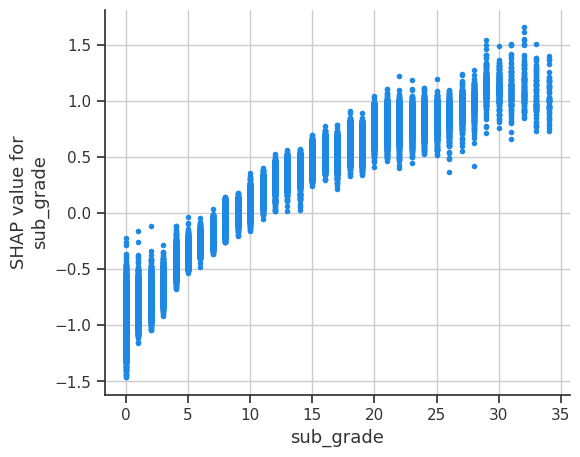

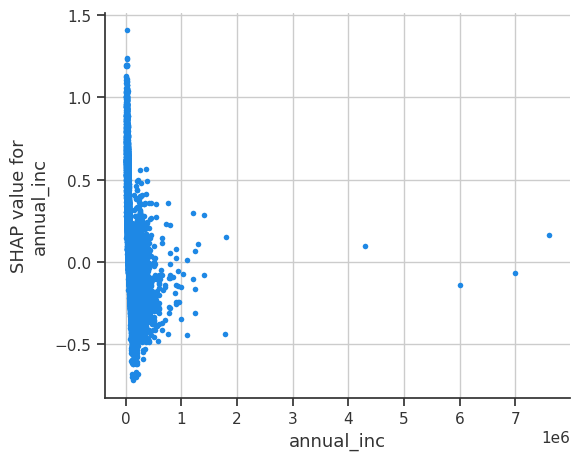

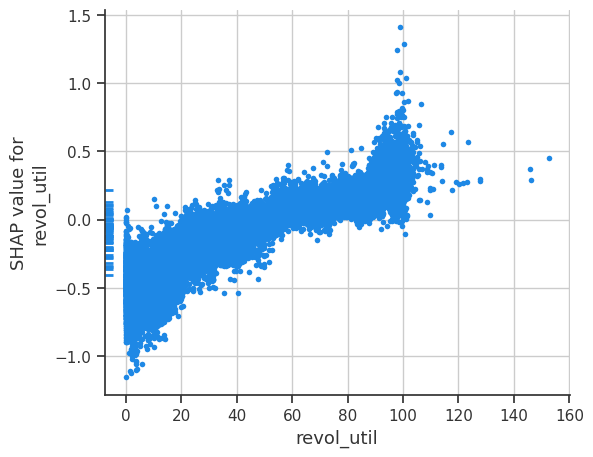

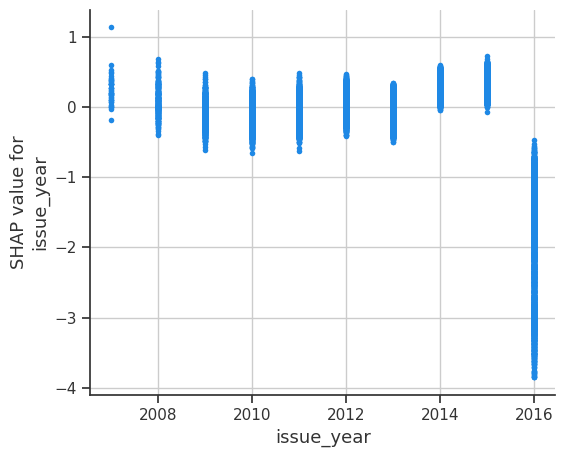

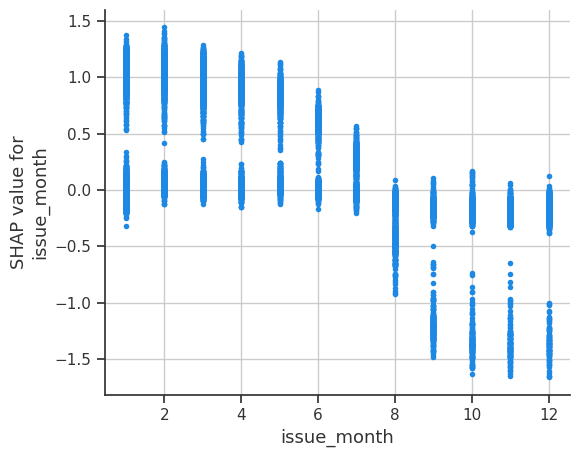

In [28]:
# Verificar que X_test está en formato DataFrame float
X_test_float = X_test.astype(float)

# Convertir valores SHAP al formato esperado (array)
shap_values_array = shap_values.values if hasattr(shap_values, "values") else shap_values

# Lista de variables clave para análisis
variables_clave = ["sub_grade", "annual_inc", "revol_util", "issue_year", "issue_month"]

# Crear los dependence plots correctamente
for variable in variables_clave:
    shap.dependence_plot(variable, shap_values_array, X_test_float, interaction_index=None)

<Figure size 1000x800 with 0 Axes>

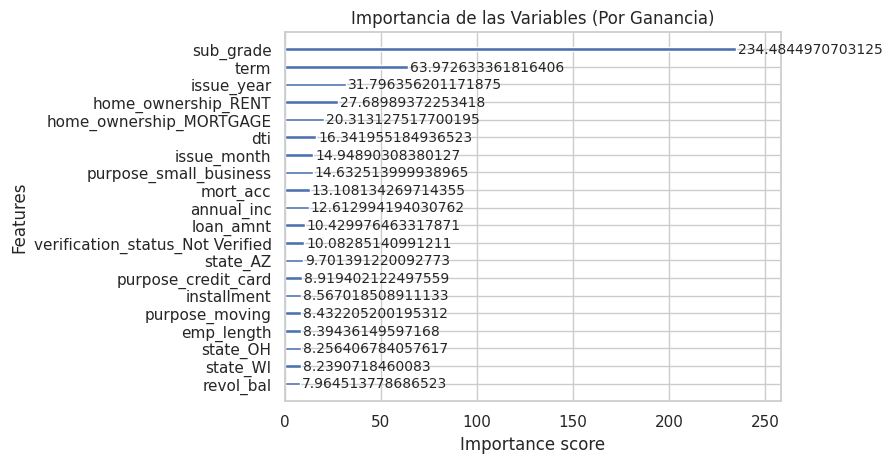

In [29]:
# Visualización de las variables más importantes del modelo (por Ganancia)
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='gain', max_num_features=20)
plt.title("Importancia de las Variables (Por Ganancia)")
plt.show()

In [ ]:
# Crear el modelo base de XGBoost
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',  # Maximizar AUC
    random_state=42
)

# Calcular el ratio de balance entre clases
ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

In [ ]:
# Definir el espacio de hiperparámetros optimizado
param_dist = {
    'max_depth': [3, 5, 7],             # Mantener solo los más efectivos
    'learning_rate': [0.01, 0.05, 0.1], # Tasa de aprendizaje efectiva
    'n_estimators': [100, 300, 500],    # Número de árboles optimizado
    'subsample': [0.7, 0.8, 1.0],       # Mantener solo las mejores opciones
    'colsample_bytree': [0.7, 0.8, 1.0],# Mantener solo las mejores opciones
    'scale_pos_weight': [ratio, ratio * 1.5]
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    scoring='roc_auc',
    n_iter=50,           # Probar solo 50 combinaciones aleatorias
    cv=5,                 # Validación cruzada de 5
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Entrenar el RandomizedSearchCV
random_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y AUC
print(f"Mejores parámetros: {random_search.best_params_}")
print(f"Mejor AUC: {random_search.best_score_:.4f}")

# Usar el mejor modelo encontrado
best_xgb = random_search.best_estimator_

In [ ]:
# Definir el Grid de hiperparámetros (ahora probamos con GridSearchCV)
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [ratio, ratio * 1.5, ratio * 2]
}
# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,  # Validación cruzada de 5
    verbose=2,
    n_jobs=-1
)
# Entrenar el GridSearch
grid_search.fit(X_train, y_train)
# Mostrar los mejores parámetros y AUC
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor AUC: {grid_search.best_score_:.4f}")
# Usar el mejor modelo encontrado
best_xgb2 = grid_search.best_estimator_